                      Нижегородский  государственный  университет  им. Н.И. Лобачевского 
                                         Радиофизический  факультет 

                                Лабораторная  работа по программированию №7
                                              
                                               Задача Коши

                                                                                       Работу  выполнил:

                                                                                       студент  радиофизического  факультета

                                                                                       430 группы 

                                                                                       Сергеев  Егор
  
                                                                                       Преподаватель: 

                                                                                       Шиндин А.В.     


                                              Нижний Новгород, 2016 


## Метод разложения в ряд Тейлора
Простейшим способом построения приближенного решения в точке $x_{n+1}$
сетки $ω_N$ является способ, основанный на разложении решения в ряд
Тейлора в предыдущей точке сетки $x_n$ по степеням шага h:
$$y(x_n+1) = y(x_n) + h_4(x_n, y_n, h)$$
$$\delta (x, y, h) ≡ y'(x) + \frac{h}{2} y"(x) + \frac{h^2}{3!}y'''(x)+......$$
Взяв вместо этого ряда конечный его отрезок
$$ϕ_p(x, y, h) ≡ y'(x) + \frac{h}{2}y"(x) + . . . + \frac{h_{p−1}}
{p!} y^{(p)}(x)$$
и заменяя в нем производные $$y_{(k)} (x)$$ в силу дифференциального уравнения
$$y' (x) = f (x, y (x)) ,$$
$$y" (x) = \frac{d}{dx} f (x, y (x)) = f'_x + f'_yf,$$
$$y''' (x) = \frac{d}{dx}f'_x + f'_yf´ = f''_{xx} + f'_{x}f'_y + ((f'_y)^2+2f''_{xy})f+f''_{yy}f^2, . . . ,$$
получаем последовательность приближений
$$y_{n+1} = y_n + hϕ_p(x_n, y_n, h), n = 0, 1, 2, . . . . $$
Отсюда, в частности, при $p = 1$ получаем схему
$$y_{n+1}=y_n +hϕ(x_n,y_n,h)$$ $$y_0 =y^0,$$  
(метод Эйлера), а при p = 2 - схему
$$y_{n +1}=y_n +h[f(x_n,y_n)+\frac{h}{2}(f_x(x_n,y_n)+f_y(x_n,y_n)f(x_n,y_n))]$$
Алгоритмы не требуют вычисления дополнительных начальных условий и позволяют легко менять шаг интегрирования. Применимость данных методов ограничена теми задачами, для которых легко
вычисляются частные производные высоких порядков функции $f(x, y)$.

## Задание:
 Решить методом Тейлора 2-ого порядка задачу Коши:

$\begin{cases}
  y''+y'-4y = x*e^{-x}~~~~~~~~~x\in {[0;2]} \\
  y(0) = 1,~y'(0) = 0
 \end{cases}$


In [33]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='Arial')
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp,sin,cos,sqrt
from numpy import linalg as l
from scipy import *
from scipy.linalg import *
from scipy.misc import *
from sympy import *
init_printing()

In [34]:
def dy(x,y,dy1):
    dy2=+4*y-dy1+exp(-x)*x
    return dy2
def teilor(f,x0,y0,s): 
    u=Symbol('u')
    t=Symbol('t')
    m=Symbol('m')
    p=0
    h = (x0[1]-x0[0])/s 
    x = np.linspace(x0[0],x0[1],s)
    n = 2
    y = np.zeros((n,s))    
    for i in range(0,n):
        y[i][0] = y0[i]
    for i in range(0,s-1):
        #y[1][i+1]=y[1][i]+h*d2y(x[i],y,i) + h*h/2*(diff(func(t,u),t).evalf(subs={t:x[i],u:y[0][i]}))
        a=dy(x[i],y[0][i],y[1][i])+(h/2)*(diff(dy(t,u,m),t).evalf(subs={t:x[i],u:y[0][i],m:y[1][i]})+ dy(x[i],y[0][i],y[1][i])*diff(dy(t,u,m),u).evalf(subs={t:x[i],u:y[0][i],m:y[1][i]}))
        y[1][i+1]=y[1][i]+h*a
        a=y[1][i]+(h/2)*dy(x[i],y,i)
        y[0][i+1] = y[0][i] + h *(y[1][i]+(h/2)*dy(x[i],y[0][i],y[1][i]))    
    x = np.linspace(x0[0],x0[1],s)
    plt.grid(True)
    plt.title('Вид искомой функции')
    plt.ylabel('Y')
    plt.xlabel('X ')
    st='Y(x)'
    plt.plot(x,y[0][:],label=st)
    plt.legend(loc=3)
    plt.grid(True)
    plt.title('Вид искомой функции')
    plt.ylabel('dy/dx')
    plt.xlabel('X')
    st='dy/dx'
    plt.plot(x,y[1][:],'r-',label=st)
    plt.legend(loc=3)
    plt.show()
    plt.grid(True)
    plt.title('Фазовая траектория')
    plt.ylabel('dy/dx')
    plt.xlabel('Y')
    plt.plot(y[0][:],y[1][:])
    plt.show()
    return y[0][:]

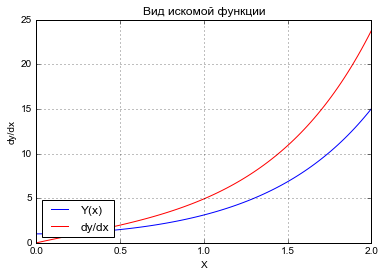

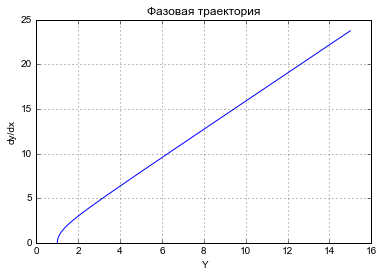

In [35]:
h=teilor(dy,[0,2],[1,0],101)

